**Importing all the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**Reading the datas**

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df , test_df]

**Analyzing the data**

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train_df.shape)
print(test_df.shape)
print(train_df.columns)
print(test_df.columns)

(891, 12)
(418, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.info()
print('_'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Analyzing Categorizable values by pivot feature**

In [10]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Plotting to see the relationships**

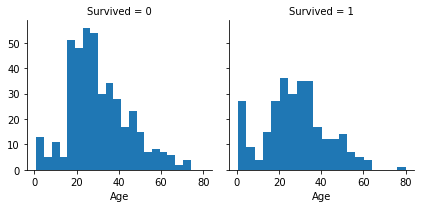

In [14]:
g = sns.FacetGrid(train_df , col = 'Survived')
g.map(plt.hist, 'Age' , bins=20)

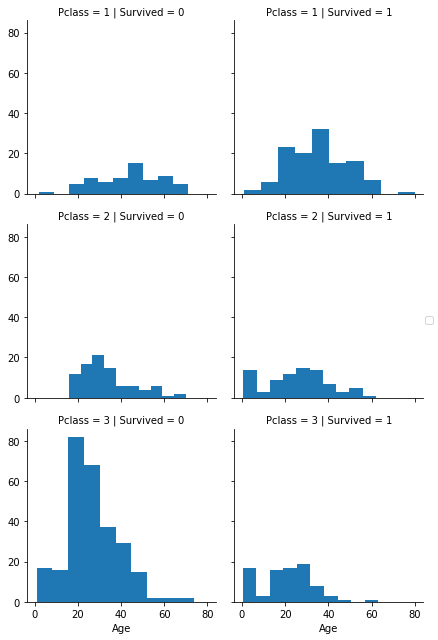

In [15]:
grid = sns.FacetGrid(train_df , col='Survived', row='Pclass')
grid.map(plt.hist ,'Age')
grid.add_legend()

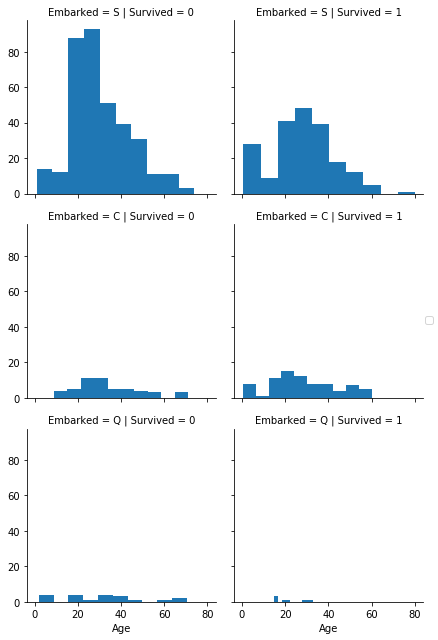

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked',col='Survived')
grid.map(plt.hist, 'Age')
grid.add_legend()

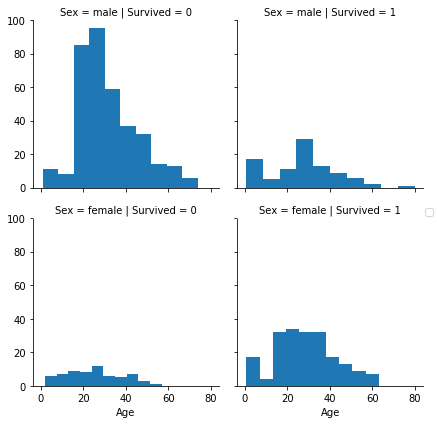

In [17]:
grid = sns.FacetGrid(train_df, row='Sex',col='Survived')
grid.map(plt.hist, 'Age')
grid.add_legend()

/home/suyog/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/suyog/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


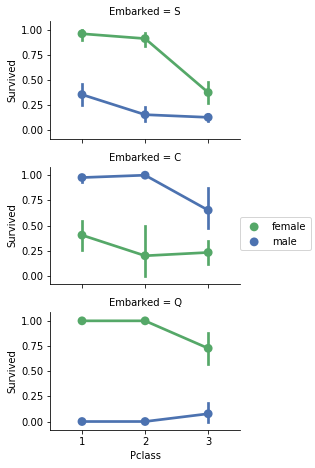

In [18]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/home/suyog/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


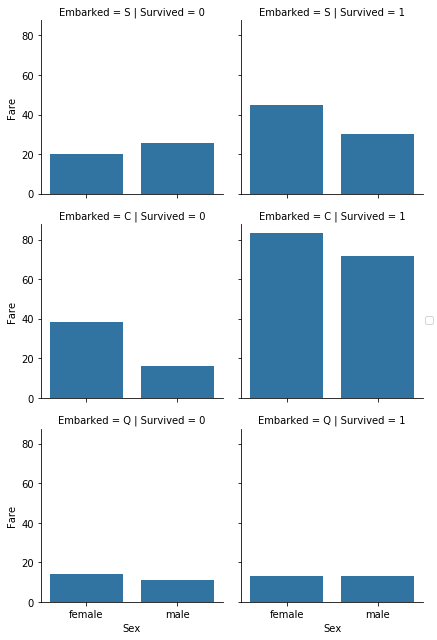

In [19]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare',ci=None)
grid.add_legend()

**Manupulating the data**

In [3]:
train_df.drop(['Ticket','Cabin'], axis=1,inplace = True)
test_df.drop(['Ticket','Cabin'], axis=1, inplace = True)

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [5]:
train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False).head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [6]:
train_df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [7]:
train_df['Titles']=train_df.Name.str.extract('([A-Za-z]+)\.')
test_df['Titles']=train_df.Name.str.extract('([A-Za-z]+)\.')

In [8]:
train_df[['Titles','Survived']].groupby(['Titles'],as_index=False).mean().sort_values(by=['Survived'],ascending=False)

,Titles,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


In [9]:
train_df['Titles'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Lady          1
Jonkheer      1
Sir           1
Ms            1
Mme           1
Countess      1
Don           1
Name: Titles, dtype: int64

In [10]:
train_df['Titles'].replace(to_replace=['Lady','Sir','Don','Jonkheer','Capt','Dr','Major','Countess','Rev','Col'],value='Rare',inplace=True)
test_df['Titles'].replace(to_replace=['Lady','Sir','Don','Jonkheer','Capt','Dr','Major','Countess','Rev','Col'],value='Rare',inplace=True)

In [11]:
train_df['Titles'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       23
Mlle        2
Ms          1
Mme         1
Name: Titles, dtype: int64

In [12]:
#replacing common titles but written in different language
train_df['Titles'].replace(to_replace=['Mlle','Ms'],value='Miss',inplace=True)
train_df['Titles'].replace(to_replace=['Mme'],value='Mrs',inplace=True)
test_df['Titles'].replace(to_replace=['Mlle','Ms'],value='Miss',inplace=True)
test_df['Titles'].replace(to_replace=['Mme'],value='Mrs',inplace=True)

In [13]:
train_df['Titles'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Titles, dtype: int64

In [8]:
train_df[['Titles','Survived']].groupby(['Titles'],as_index=False).mean().sort_values(by=['Survived'],ascending=False)

,Titles,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


**Mapping the datas**

In [14]:
#mapping titles
title_mapping = {"Mr":1 , "Miss":2 , "Mrs":3 ,"Master":4 , "Rare":5}
for dataset in combine:
    dataset['Titles'] = dataset['Titles'].map(title_mapping)
    dataset['Titles'] = dataset['Titles'].fillna(0)
train_df['Titles'].head()

0    1
1    3
2    2
3    3
4    1
Name: Titles, dtype: int64

In [15]:
#mapping the sex
sex_mapping={'male': 0, 'female':1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [11]:
train_df['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [16]:
#Handling missing ages
print(train_df['Age'].isna().sum())
print(test_df['Age'].isna().sum())

177
86


In [18]:
#looks like we've got some missing ages in both training as well as test data
#so we guess the missing values using the correlation between age and gender
#then we fill the missing datas using median values for age across gender

In [17]:
train_df[['Age','Sex']].groupby(['Sex'],as_index=False).mean()

,Sex,Age
0,0,30.726645
1,1,27.915709


In [18]:
test_df[['Age','Sex']].groupby(['Sex'],as_index=False).mean()

,Sex,Age
0,0,30.272732
1,1,30.272362


In [19]:
em = train_df[train_df['Embarked'].isna()]

In [20]:
male=train_df[(train_df['Age'].isna()) & (train_df['Sex']==0)]
female = train_df[(train_df['Age'].isna()) & (train_df['Sex']==1)]

In [21]:
train_df.dropna(inplace=True)

In [22]:
male=male.fillna(30.726645)

In [23]:
female=female.fillna(27.915709)

In [24]:
train_df=pd.concat([train_df,male,female,em])

In [26]:
train_df.shape

(891, 11)

In [27]:
#Repeating the same thing for testing set
test_df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Titles          0
dtype: int64

In [28]:
fare = test_df[test_df['Fare'].isna()]
male=test_df[(test_df['Age'].isna()) & (test_df['Sex']==0)]
female = test_df[(test_df['Age'].isna()) & (test_df['Sex']==1)]

In [29]:
male=male.fillna(30.272732)
female=female.fillna(30.272362)

In [30]:
test_df.dropna(inplace=True)

In [32]:
test_df = pd.concat([test_df,male,female,fare])

In [33]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
365,1257,3,"Sage, Mrs. John (Annie Bullen)",1,30.272362,1,9,69.5500,S,1
382,1274,3,"Risien, Mrs. Samuel (Emma)",1,30.272362,0,0,14.5000,S,1
408,1300,3,"Riordan, Miss. Johanna Hannah""""",1,30.272362,0,0,7.7208,Q,1
410,1302,3,"Naughton, Miss. Hannah",1,30.272362,0,0,7.7500,Q,1
152,1044,3,"Storey, Mr. Thomas",0,60.500000,0,0,NaN,S,1


In [35]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Titles         0
dtype: int64

In [36]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Titles         0
dtype: int64

In [47]:
train_df.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Titles
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644


In [48]:
#Since S has maximum number of passengers ; we replace the NaN by S

In [51]:
train_df.fillna('S',inplace=True)

In [52]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Titles         0
dtype: int64

In [54]:
test_df.Fare.mean()

35.6271884892086

In [55]:
#So we replace missing fares by the mean fare

In [56]:
test_df.fillna(35.6271884892086,inplace=True)

In [57]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Titles         0
dtype: int64